In [241]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from utils import read_data
import seaborn as sns
import pandas as pd

In [242]:
# modelName = "m16"
modelName = "p16"
mode = "TRAIN"

In [243]:
if mode == "TRAIN":
    sourceFolder = "o7_analyze_train"
elif mode == "TEST":
    sourceFolder = "o7_analyze_test"
else:
    raise ValueError("Unknown mode")
sourceFolder = os.path.join(sourceFolder, modelName)

In [244]:
cwd = sys.path[0]
outputFolderPath = os.path.join(cwd, sourceFolder)
folderNames = os.listdir(outputFolderPath)

data = {}
for folderName in folderNames:
    folderPath = os.path.join(outputFolderPath, folderName)
    data_pickle, data_json = read_data(folderPath)

    # X_pred = data_pickle["X_pred"]
    # X_true = data_pickle["X_true"]
    # tArrayPred = data_pickle["tArrayPred"]
    # mseArray = data_pickle["mseArray"]
    # dx = data_json["s2"]["dx"]
    # L = data_json["s2"]["L"]

    valueArray = data_pickle["mapeArray"]
    data[folderName] = valueArray

tArrayPred = data_pickle["tArrayPred"]
df = pd.DataFrame(data=data, index=tArrayPred)

In [245]:
dft = df.copy()
dft["time"] = dft.index

value_vars = [col for col in dft.columns.values if col != "time"]
dfLong = pd.melt(
    dft, id_vars=["time"], value_vars=value_vars, var_name="folder", value_name="value"
)
dfLong

,time,folder,mse
0,0.0,2024-01-05-10-40-39,0.000000
1,4.0,2024-01-05-10-40-39,0.016452
2,8.0,2024-01-05-10-40-39,0.064812
3,12.0,2024-01-05-10-40-39,0.161368
4,16.0,2024-01-05-10-40-39,0.101014
...,...,...,...
3613,784.0,2024-01-05-10-40-49,0.275343
3614,788.0,2024-01-05-10-40-49,0.214015
3615,792.0,2024-01-05-10-40-49,0.226457
3616,796.0,2024-01-05-10-40-49,0.278727


In [246]:
# df.iloc[-1,:].describe()def getBoxPlot(row):
def getBoxPlot(row):
    des = row.describe()
    upper_quartile = des["75%"]
    lower_quartile = des["25%"]
    iqr = upper_quartile - lower_quartile

    upper_whisker = row[row <= (upper_quartile + 1.5 * iqr)].max()
    lower_whisker = row[row >= (lower_quartile - 1.5 * iqr)].min()
    return lower_whisker, upper_whisker


dfWide = df.copy()
dfWide["mean"] = dfWide.apply(lambda row: row.describe()["mean"], axis=1)
dfWide["std"] = dfWide.apply(lambda row: row.describe()["std"], axis=1)
dfWide["25%"] = dfWide.apply(lambda row: row.describe()["25%"], axis=1)
dfWide["75%"] = dfWide.apply(lambda row: row.describe()["75%"], axis=1)
dfWide["lower_whisker"] = dfWide.apply(lambda row: getBoxPlot(row)[0], axis=1)
dfWide["upper_whisker"] = dfWide.apply(lambda row: getBoxPlot(row)[1], axis=1)
dfWide["median"] = dfWide.apply(lambda row: row.median(), axis=1)

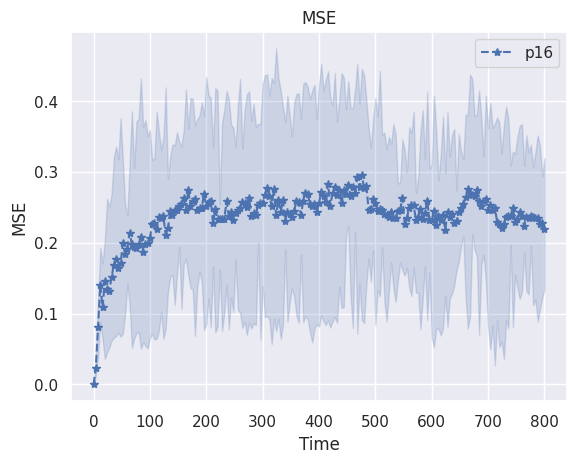

In [247]:
sns.set_theme()

fig, ax = plt.subplots()

xp = dfWide.index.values
yp = dfWide["median"].values
errU = dfWide["upper_whisker"]
errL = dfWide["lower_whisker"]

ax.plot(xp, yp, "--*", label=modelName)
ax.fill_between(xp, errU, errL, color="b", alpha=0.2)
ax.set_title(r"MSE")
ax.set_xlabel("Time")
ax.set_ylabel("MSE")

plt.legend()

In [248]:
numBar = 10
idxList = np.linspace(0, tArrayPred.shape[0] - 1, numBar).astype(int)
tList = tArrayPred[idxList]

In [249]:
filt = dfLong["time"].isin(tList)

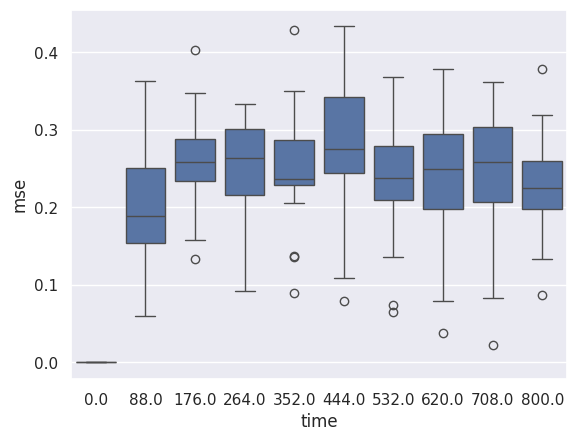

In [250]:
numBar = 10
idxList = np.linspace(0, tArrayPred.shape[0] - 1, numBar).astype(int)
tList = tArrayPred[idxList]
filt = dfLong["time"].isin(tList)
ax = sns.boxplot(data=dfLong[filt], x="time", y="value", whis=1.5)